In [51]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
lr = linear_model.LinearRegression()

# import plotly as py
# py.tools.set_credentials_file(username='VeeraMarni', api_key='')

# def plot(y, Y):
#     fig, ax = plt.subplots(2,1)
#     ax[0].plot(t,y)
#     ax[1].plot(frq,Y)
#     ax[0].set_xlabel('Time')
#     ax[0].set_ylabel('Amplitude')
#     ax[1].set_xlabel('Freq (Hz)')
#     ax[1].set_ylabel('|Y(freq)|')
#     plot_url = py.plotly.plot_mpl(fig, filename='mpl-basic-fft')

class Plot:
    
    def __init__(self):
        fig = plt.figure()
    
    def plot1(self, x, y, title="Signal"):
        plt.title(title)
        plt.plot(x, y,)
        plt.xlabel('Time')
        plt.ylabel('Amplitude')
        plt.show()


    def plot2(self, x, y, X, Y, title1="Signal", title2="Spectrum"):
        plt.subplot(211)
        plt.title(title1)
        plt.plot(x, y,)
        plt.xlabel('Time')
        plt.ylabel('Amplitude')
        plt.legend()
        plt.subplot(212)
        plt.title(title2)
        plt.plot(X, Y)
        plt.xlabel('Freq (Hz)')
        plt.ylabel('|Y(freq)|')
        plt.tight_layout()
        plt.show()
    
# Making a signal

def makeSignal(amp=1, f=1,sr=150):
    '''
    f: frequency of the signal
    sr: sampling rate
    '''    
    si = 1.0/(sr) # sampling interval
    t = np.arange(0,1,si)  # time vector generation
    y = amp * np.sin(2*np.pi*f*t)
    return y,t

# Fourier Transformation

def fft(y, sr, upperHalf=False):
    '''
    y: signal
    sr: sampling rate
    '''
    n = len(y) # length of y
    k = np.arange(n)
    T = n/sr
    frq = k/T # 2 side frequency range
    Y = np.fft.fft(y)
    Y = np.abs(Y)[1:]/np.sum(np.abs(Y)[1:]) # removing freq when n=0
    if upperHalf == True:
        return Y, frq
    else:
        Y = Y[range(int(n/2))]
        frq = frq[range(int(n/2))] # 1 side frequency range
        return Y, frq
    
# Add Noise into the signal

def addNoise(y, mu=0.1, sd=0.1):
    n = len(y)
    return y + np.random.normal(loc=mu, scale=sd, size=n)

# Finding the frequency with highest power

def maxFreqPow(Y, frq):
    index = np.argmax(Y)
    Y[index] = 0 # removing the power for selected freq
    return frq[index]+1 # adding 1 because we removed the freq when n = 0

def isolateNoise(y, sr, n=1, plt=False):
    Y, frq = fft(y=y,sr=sr)
    frqR = list()
    # n is choosen because there are n frequencies with significant power in the signal
    for i in range(n): 
        maxFreq = maxFreqPow(Y, frq)
        frqR.append(maxFreq)
    print frqR
        
    # generate data for linear regression to estimate amplitudes of each frequency
    yhat = makeSignal(f=frqR[0], sr=sr)[0]
    X = yhat    
    for i in range(1,n):
        yhat = makeSignal(f=frqR[i], sr=sr)[0]
        X = np.vstack((X,yhat))
    X = X.T
    lr.fit(X,y)
    return lr.coef_, frqR

draw = Plot()

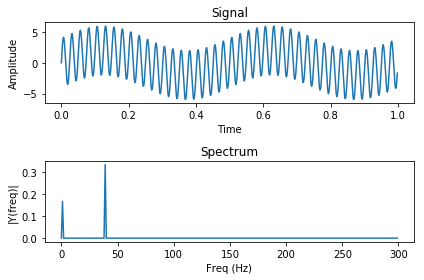

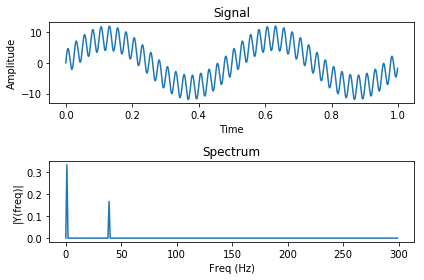

Note: The signal with high amplitude has high power in both the cases


In [52]:
# signal generation with 2 different frequencies and 2 different amplitudes
sr = 600
y1, t = makeSignal(amp=2, f=2, sr=sr); y2, t = makeSignal(amp=4, f=40, sr=sr)
y = y1 + y2
Y, frq = fft(y=y, sr=sr)
draw.plot2(t,y,frq,Y)
y1, t = makeSignal(amp=8, f=2, sr=sr); y2, t = makeSignal(amp=4, f=40, sr=sr)
y = y1 + y2
Y, frq = fft(y=y, sr=sr)
draw.plot2(t,y,frq,Y)
print "Note: The signal with high amplitude has high power in both the cases"

[2, 4]


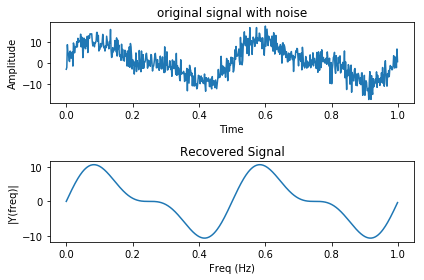

Amplitudes Recovered:  [ 8.16677942  4.09452739] Frequencies Recovered [2, 4]


In [44]:
# esitmating the frequencies, Amplitudes and isolate noise
sr = 600
y1, t = makeSignal(amp=8, f=2, sr=sr); y2, t = makeSignal(amp=4, f=4, sr=sr)
y = addNoise(y=y1 + y2, mu=0.9, sd=3) # noisy signal
wR, frqR = isolateNoise(y=y,sr=sr,n=2)
y1, t = makeSignal(amp=wR[0], f=frqR[0], sr=sr); y2, t = makeSignal(amp=wR[1], f=frqR[1], sr=sr)
yhat = y1 + y2 # recovered signal
draw.plot2(t, y, t, yhat, title1="original signal with noise", title2="Recovered Signal")
print "Amplitudes Recovered: ", wR, "Frequencies Recovered",frqR